# Load Libraries


In [1]:
import requests
from datetime import datetime, timedelta
import json
import pandas as pd
import matplotlib.pyplot as plt


# Setup


In [3]:
#  OPen Weather APi Key
apiKey = "05d26a856cc9acf4026b4d3175cbcde3"
# Current lat long is set to Calgary, Change this to get different data 
lat = 51.1215031
lon = -114.0098043

#CHange the language and the units if needed 
lang = 'en'
units = 'metric'
historicalDataForPast5Days = []

# Iterate through the data and populate the historicalDataForPast5Days
for i in range(1, 6):
    date = (datetime.now() - timedelta(i)).strftime("%s")
    oneCallUrlHistorical = f"https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={lat}&lon={lon}&dt={date}&appid={apiKey}&lang={lang}&units={units}"

    response = requests.get(oneCallUrlHistorical)
    data = response.json()

    # Add human readable date to the data
    data['current']['dtStr'] = datetime.utcfromtimestamp(data['current']["dt"]).strftime(
        '%b-%d-%Y')
    for j, item in enumerate(data["hourly"]):
        data['hourly'][j]['dtStr'] = datetime.utcfromtimestamp(item["dt"]).strftime(
            '%b-%d-%Y')
    historicalDataForPast5Days[:0]=[data]
    
# Isolate current from hourly data 
currentDataForPast5Days = pd.json_normalize(historicalDataForPast5Days)
hourlyDataForpast5days = pd.json_normalize(historicalDataForPast5Days, ['hourly'])

# Extract and save relevat information 
days = list(currentDataForPast5Days['current.dtStr'])
temp = []
for i in range(0,5):
    t = hourlyDataForpast5days.loc[hourlyDataForpast5days.dtStr == days[i]]['temp'].mean()
    temp[:0] = [t]

# Plot  Linear Graph

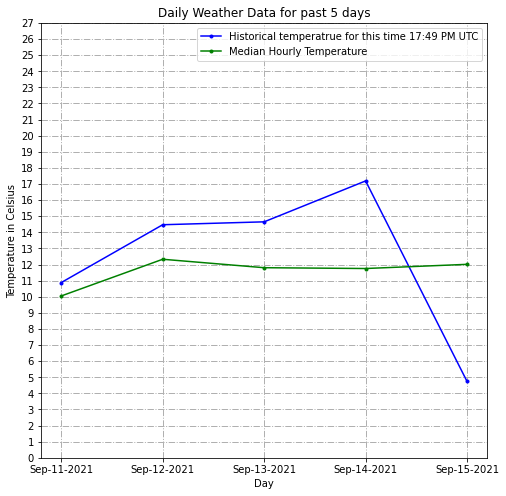

In [7]:
# Plot the data with matplotlib
plt.figure(figsize=(8,8))
plt.title("Daily Weather Data for past 5 days")

currentDataLabel = f"Historical temperatrue for this time {datetime.now().strftime('%H:%M %p UTC')}"
plt.plot(currentDataForPast5Days['current.dtStr'],currentDataForPast5Days['current.temp'], 'b.-', label=currentDataLabel)
plt.plot(days,temp, 'g.-',label="Median Hourly Temperature")

plt.legend()

plt.yticks(list(range(0,28)))
plt.xlabel("Day")
plt.ylabel("Temperature in Celsius")

plt.grid(True, which="both", axis="both", linestyle='-.', linewidth=1)


plt.show()



# Histogram

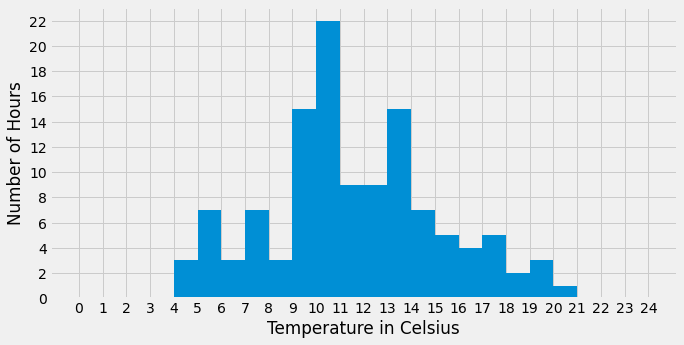

In [32]:
bins = list(range(0,25))
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.hist(hourlyDataForpast5days.temp, bins=bins)
plt.xticks(bins)
plt.yticks(list(range(0,23,2)))
plt.xlabel('Temperature in Celsius')
plt.ylabel('Number of Hours')
plt.show()

# Box and Whisker Plot

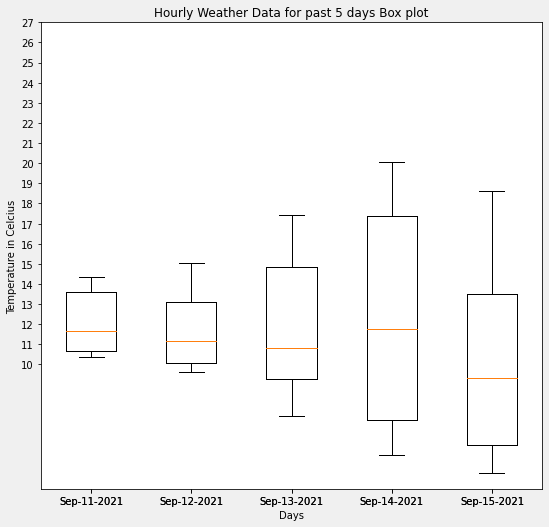

In [34]:
days = list(currentDataForPast5Days['current.dtStr'])

day1Temp = hourlyDataForpast5days.loc[hourlyDataForpast5days.dtStr == days[0]]['temp']
day2Temp = hourlyDataForpast5days.loc[hourlyDataForpast5days.dtStr == days[1]]['temp']
day3Temp = hourlyDataForpast5days.loc[hourlyDataForpast5days.dtStr == days[2]]['temp']
day4Temp = hourlyDataForpast5days.loc[hourlyDataForpast5days.dtStr == days[3]]['temp']
day5Temp = hourlyDataForpast5days.loc[hourlyDataForpast5days.dtStr == days[4]]['temp']

plt.figure(figsize=(8,8))
plt.style.use('default')
plt.boxplot([day1Temp,day2Temp,day3Temp,day4Temp,day5Temp,],labels=days)
plt.boxplot([day1Temp,day2Temp,day3Temp,day4Temp,day5Temp,],labels=days)
plt.yticks(list(range(10,28)))
plt.title("Hourly Weather Data for past 5 days Box plot")
plt.xlabel("Days")
plt.ylabel("Temperature in Celcius")
plt.show()